# u2001820 Powerlifting Project: Natural or Not?
---
We aim to investigate the powerlifting dataset available on <a href="https://www.kaggle.com/datasets/open-powerlifting/powerlifting-database">Kaggle</a>.

This notebook is dedicated to exploring tested and untested athletes in powerlifting.

In [1]:
# imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ks_2samp

In [2]:
df = pd.read_csv("cleaned_powerlifting.csv")

## Natural or not?
---
Just because a lifter has not been tested for PED's, does not mean that they are using them. We can construct a hypothesis test to determine whether or not the distribution of `TotalKg` values is statistically different between the athletes who have been tested and those who have not. A significant difference implies that those are have not been tested are in fact abusing PEDs in competitions. Concretely:

$H_0$: lifters who have not been tested for PED use are natural athletes (i.e. are not using PEDs).

$H_A$: lifters who have not been tested for PED use are enhanced athletes (i.e. are using PEDs).


We can now compare the lifts between tested and untested athletes in the dataset. We compare males and females separately for the sake of clearer investigation. For clarity, we modify the values in the `Tested` column to `Natural` and `Not tested`. We restrict our study to `Single-ply` athletes.

In [3]:
df_test = df[['Name', 'Sex', 'Equipment', 'BodyweightKg', 'Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg', 
               'TotalKg', 'Tested']]

In [6]:
# redoing data handling from previous section
df_test = df[['Name', 'Sex', 'Equipment', 'BodyweightKg', 'Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg', 
               'TotalKg', 'Tested']]

df_test = df_test[df_test['Equipment'] == 'Single-ply']

# relabelling values in the `Tested` column
df_test['Tested'].fillna('Not tested', inplace = True)
df_test['Tested'].replace('Yes', 'Natural', inplace = True)

df_test = df_test.groupby(['Name','Sex',
                       'Tested'])[['Best3SquatKg','Best3BenchKg',
                       'Best3DeadliftKg','TotalKg','BodyweightKg']].mean().reset_index()

# df_test['WeightClassKg'] = df_test['BodyweightKg'].apply(float)

def weight_class(x):
    for i in range(10, 140, 10):
        if(x < i):
            return f"{str(i-10).zfill(3)} - {i} kg"
    return "130+ kg"

  
df_test['WeightClassKg'] = df_test['BodyweightKg'].apply(lambda x: weight_class(x))

In [7]:
df_test.head()

,Name,Sex,Tested,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,BodyweightKg,WeightClassKg
0,A Abduzhabarov,M,Natural,155.0,110.0,170.0,435.0,74.00,070 - 80 kg
1,A Ashwin,M,Natural,180.0,95.0,210.0,485.0,81.70,080 - 90 kg
2,A Bauer,M,Natural,145.0,90.0,150.0,385.0,51.70,050 - 60 kg
3,A Dilmuradov,M,Natural,95.0,50.0,115.0,260.0,59.90,050 - 60 kg
4,A Dilymuradov,M,Natural,90.0,40.0,105.0,235.0,59.05,050 - 60 kg


In [8]:
df_test['Tested'].value_counts()

Tested
Natural       46333
Not tested     4564
Name: count, dtype: int64

We assess the cases of males and females separately:

In [9]:
df_males = df_test[df_test['Sex'] == 'M']
df_females = df_test[df_test['Sex'] == 'F']

males_nat = df_males[df_males['Tested'] == 'Natural']
males_enh = df_males[df_males['Tested'] == 'Not tested']

In [10]:
males_nat.head()

,Name,Sex,Tested,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,BodyweightKg,WeightClassKg
0,A Abduzhabarov,M,Natural,155.0,110.0,170.0,435.0,74.00,070 - 80 kg
1,A Ashwin,M,Natural,180.0,95.0,210.0,485.0,81.70,080 - 90 kg
2,A Bauer,M,Natural,145.0,90.0,150.0,385.0,51.70,050 - 60 kg
3,A Dilmuradov,M,Natural,95.0,50.0,115.0,260.0,59.90,050 - 60 kg
4,A Dilymuradov,M,Natural,90.0,40.0,105.0,235.0,59.05,050 - 60 kg


In [11]:
males_enh.head()

,Name,Sex,Tested,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,BodyweightKg,WeightClassKg
83,A. Green,M,Not tested,277.500,185.000,302.500,765.000,110.00,110 - 120 kg
94,A. Johnson,M,Not tested,136.080,129.270,158.760,424.110,75.00,070 - 80 kg
132,A. McFatridge,M,Not tested,210.000,132.500,240.000,582.500,60.00,060 - 70 kg
197,A. Torres,M,Not tested,172.500,86.875,184.375,443.750,62.75,060 - 70 kg
212,A. Warner,M,Not tested,196.875,136.875,244.375,578.125,117.50,110 - 120 kg


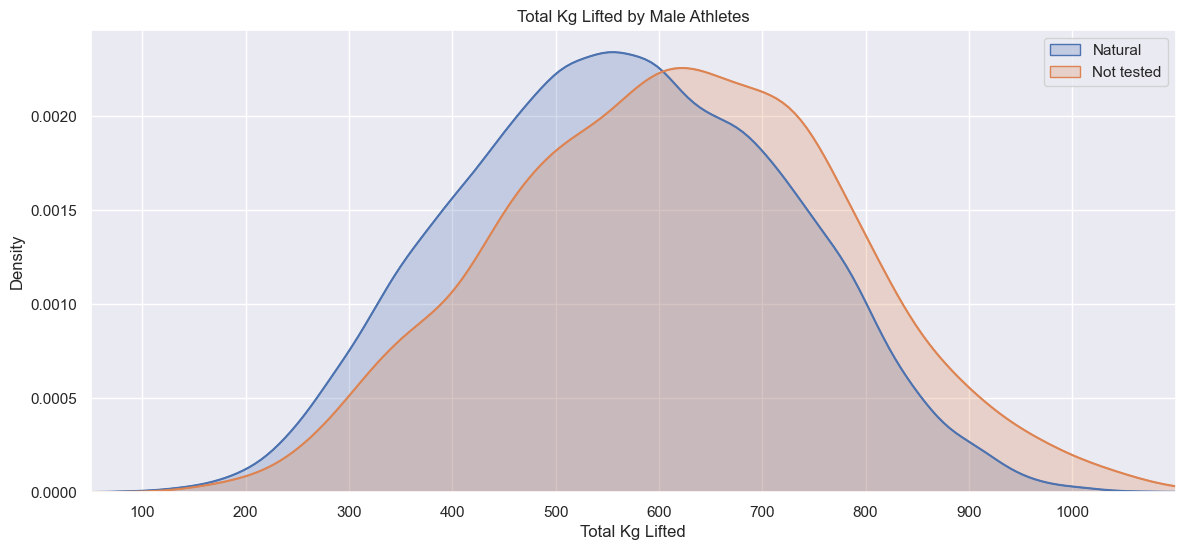

In [15]:
plt.close('all')
plt.figure(figsize = (14, 6))
sns.set()

sns.kdeplot(males_nat['TotalKg'], label='Natural', fill=True)
sns.kdeplot(males_enh['TotalKg'], label='Not tested', fill=True)

ax1 = sns.kdeplot(males_nat['TotalKg'])
x1_m, y1_m = ax1.get_lines()[-1].get_data()
ax2 = sns.kdeplot(males_enh['TotalKg'])
x2_m, y2_m = ax2.get_lines()[-1].get_data()

plt.title("Total Kg Lifted by Male Athletes")
plt.legend()
#plt.yticks([])
plt.xticks([0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])
plt.xlim(50, 1100)
plt.xlabel('Total Kg Lifted')
plt.ylabel('Density')
plt.show()

To compare these distributions, we employ a 2-sided Kolmogorov-Smirnov test, with a 5% significance level. Some notes on how the K-S test operates can be found <a href="https://www.statisticshowto.com/kolmogorov-smirnov-test/">here</a>.

In [16]:
males_ks_test = ks_2samp(y1_m, y2_m)
print(males_ks_test)

KstestResult(statistic=0.09, pvalue=0.39352743357720954, statistic_location=3.041972096481473e-05, statistic_sign=1)


The K-S test yields a p-value larger than our significance level, so we do not reject the null hypothesis. Thus, we cannot determine the natual/enhanced status of male powerlifters.

We repeat the experiment for female powerlifters:

In [18]:
females_nat = df_females[df_females['Tested'] == 'Natural']
females_enh = df_females[df_females['Tested'] == 'Not tested']

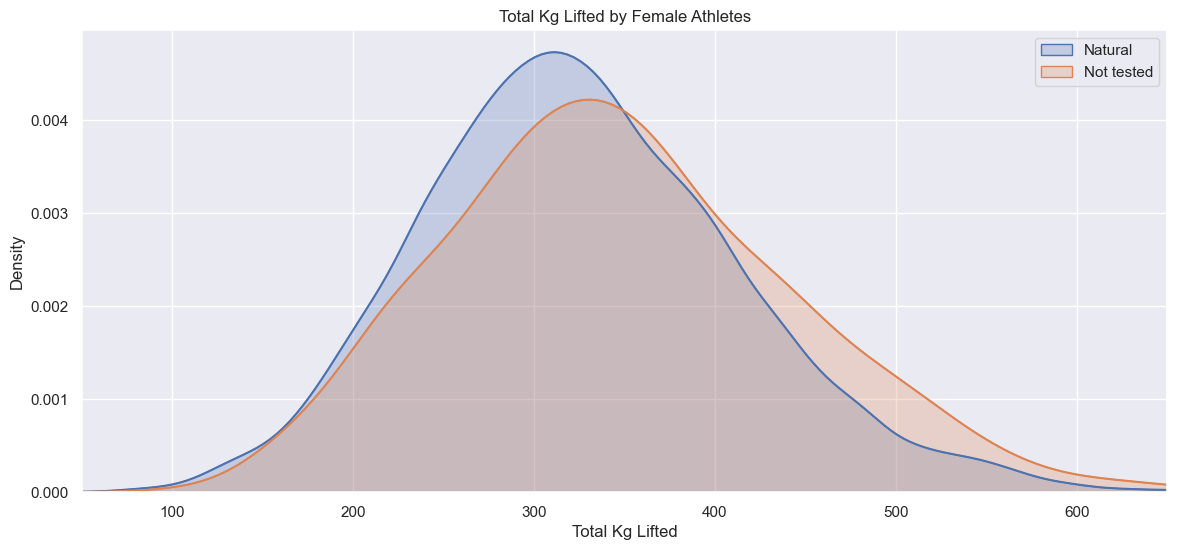

In [19]:
plt.close('all')
plt.figure(figsize = (14, 6))
sns.set()
# sns.set_context("notebook", font_scale = 1.1)

sns.kdeplot(females_nat['TotalKg'], label='Natural', fill=True)
sns.kdeplot(females_enh['TotalKg'], label='Not tested', fill=True)

ax1 = sns.kdeplot(females_nat['TotalKg'])
x1_f, y1_f = ax1.get_lines()[-1].get_data()
ax2 = sns.kdeplot(females_enh['TotalKg'])
x2_f, y2_f = ax2.get_lines()[-1].get_data()

plt.title("Total Kg Lifted by Female Athletes")
plt.legend()
#plt.yticks([])
plt.xticks([0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])
plt.xlim(50, 650)
plt.xlabel('Total Kg Lifted')
plt.ylabel('Density')
plt.show()

Now for the corresponding K-S test:

In [21]:
ks_2samp(y1_f, y2_f)

KstestResult(statistic=0.1, pvalue=0.2704743832803917, statistic_location=0.004221472972602513, statistic_sign=-1)

Once again, we cannot reject the null hypothesis as the p-value is greater than our significance level.

We conclude in either case that the natural status of untested athletes cannot be determined.

How about the t-test?

In [32]:
stats.ttest_ind(y1_m, y2_m)

TtestResult(statistic=-0.08324985578185945, pvalue=0.9336947251645582, df=398.0)

In [33]:
stats.ttest_ind(y1_f, y2_f)

TtestResult(statistic=1.0655951315179013, pvalue=0.2872527040826424, df=398.0)

Once again, we cannot reject our null hypotheses.

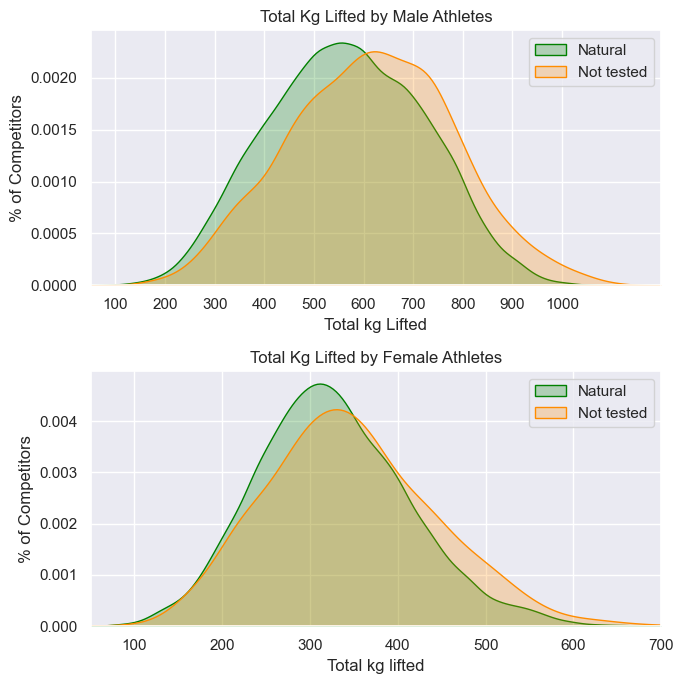

In [29]:
# subplots for report
sns.set()
fig, axes = plt.subplots(2, 1, figsize=(7, 7))
sns.kdeplot(males_nat['TotalKg'], label='Natural', fill=True, ax=axes[0], color='green')
sns.kdeplot(males_enh['TotalKg'], label='Not tested', fill=True, ax=axes[0], color='darkorange')
axes[0].set_title('Total Kg Lifted by Male Athletes')
axes[0].set_xlabel('Total kg Lifted')
axes[0].set_ylabel('% of Competitors')
axes[0].set_xlim(50, 1200)
axes[0].set_xticks([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])
axes[0].legend()


sns.kdeplot(females_nat['TotalKg'], label='Natural', fill=True, ax=axes[1], color='green')
sns.kdeplot(females_enh['TotalKg'], label='Not tested', fill=True, ax=axes[1], color='darkorange')
axes[1].set_title('Total Kg Lifted by Female Athletes')
axes[1].set_xlabel('Total kg lifted')
axes[1].set_ylabel('% of Competitors')
axes[1].set_xlim(50, 700)
#axes[1].set_xticks([0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])
axes[1].legend()


plt.tight_layout()
plt.show()

## Q-Q plot

In [22]:
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples

In [23]:
type(y1_m)

numpy.ndarray

<Figure size 800x600 with 0 Axes>

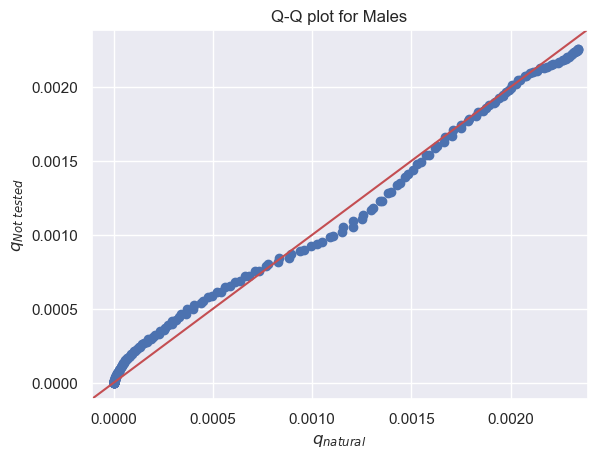

In [30]:
# qqplot_2samples(y1_m, y2_m)
plt.figure(figsize=(8, 6))
pp_x = sm.ProbPlot(y1_m)
pp_y = sm.ProbPlot(y2_m)
qqplot_2samples(pp_x, pp_y, xlabel='$q_{natural}$', ylabel='$q_{Not\ tested}$',line='45')
plt.title('Q-Q plot for Males')
plt.show()

<Figure size 800x600 with 0 Axes>

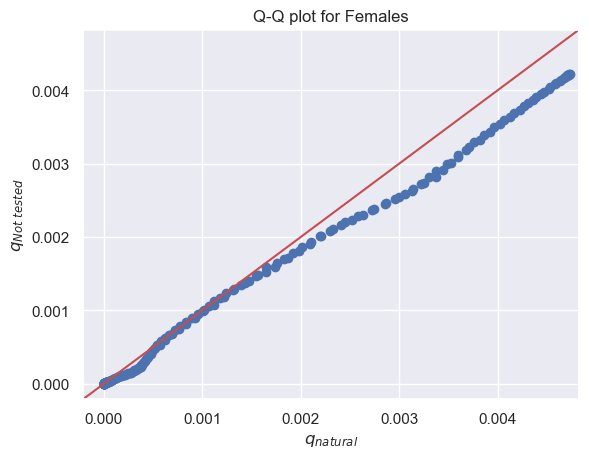

In [31]:
plt.figure(figsize=(8, 6))
pp_x = sm.ProbPlot(y1_f)
pp_y = sm.ProbPlot(y2_f)
qqplot_2samples(pp_x, pp_y, xlabel='$q_{natural}$', ylabel='$q_{Not\ tested}$',line='45')
plt.title('Q-Q plot for Females')
plt.show()